In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df=pd.read_csv("D:\Reviews.csv\Reviews.csv")
df=df.head(500)

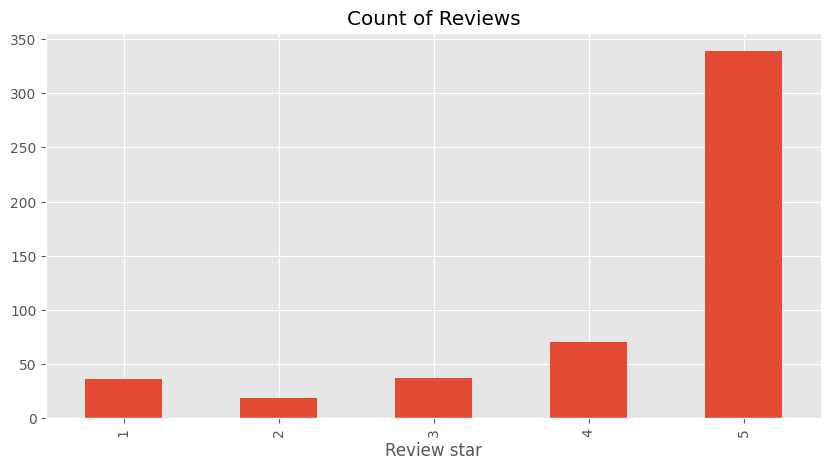

In [5]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews',
                                            figsize=(10,5))
ax.set_xlabel('Review star')
plt.show()

In [6]:
example=df['Text'][49]
print(example)

This is the same stuff you can buy at the big box stores.  There is nothing healthy about it.  It is just carbs and sugars.  Save your money and get something that at least has some taste.


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10] #splitting the words in a sentence

['This', 'is', 'the', 'same', 'stuff', 'you', 'can', 'buy', 'at', 'the']

In [8]:
nltk.download('averaged_perceptron_tagger')
  
tagged = nltk.pos_tag(tokens)
tagged[:10] #assigning each word to a dedicated tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('stuff', 'NN'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('buy', 'VB'),
 ('at', 'IN'),
 ('the', 'DT')]

In [9]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  the/DT
  same/JJ
  stuff/NN
  you/PRP
  can/MD
  buy/VB
  at/IN
  the/DT
  big/JJ
  box/NN
  stores/NNS
  ./.
  There/EX
  is/VBZ
  nothing/NN
  healthy/JJ
  about/IN
  it/PRP
  ./.
  It/PRP
  is/VBZ
  just/RB
  carbs/JJ
  and/CC
  sugars/NNS
  ./.
  Save/VB
  your/PRP$
  money/NN
  and/CC
  get/VB
  something/NN
  that/WDT
  at/IN
  least/JJS
  has/VBZ
  some/DT
  taste/NN
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
 nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
sia.polarity_scores(example) #polarity score for the example

{'neg': 0.056, 'neu': 0.865, 'pos': 0.079, 'compound': 0.2363}

In [12]:
#running the polarity score on the whole dataset and merging the results as we go forward
res = {} #empty dic to store the polarity scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [15]:
pip install ipywidgets

     -------------------------------------- 138.3/138.3 kB 8.0 MB/s eta 0:00:00
     ------------------------------------- 198.2/198.2 kB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 19.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [14]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


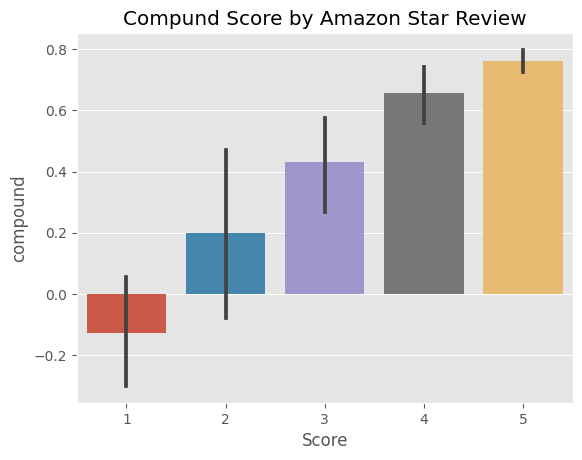

In [17]:
import seaborn as sns
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

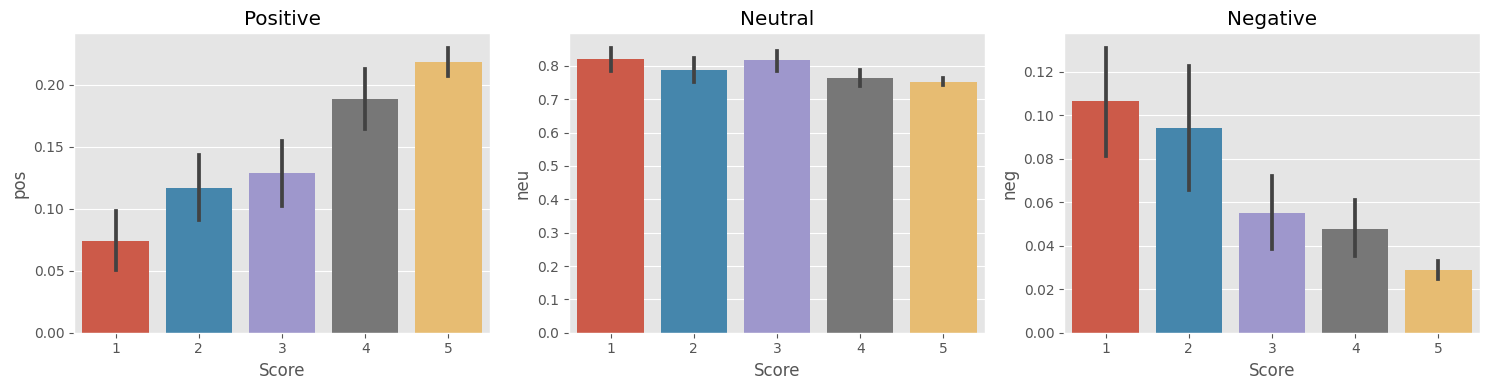

In [20]:
#subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()